In [1]:
from matplotlib import pyplot as plt
from wsi import WSIDataset
from pathlib import Path
import random
import numpy as np
from augmentations import Augmentations
from masking import MaskingGenerator
import torch
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
data_path = "/home/ubuntu/Documents/wsi"
dataset = WSIDataset(Path(data_path), None)

In [15]:
path = random.choice(dataset.files)
wsi = dataset.reader.read(path.as_posix())
highest_level = dataset.reader.get_level_count(wsi)-1
microns_at_highest_level = dataset.reader.get_mpp(wsi, highest_level)
data = dataset.reader.get_data(wsi, level=highest_level)


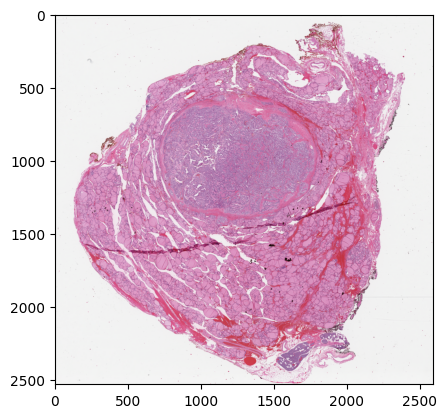

In [16]:
plt.imshow(np.moveaxis(data[0], 0, 2))

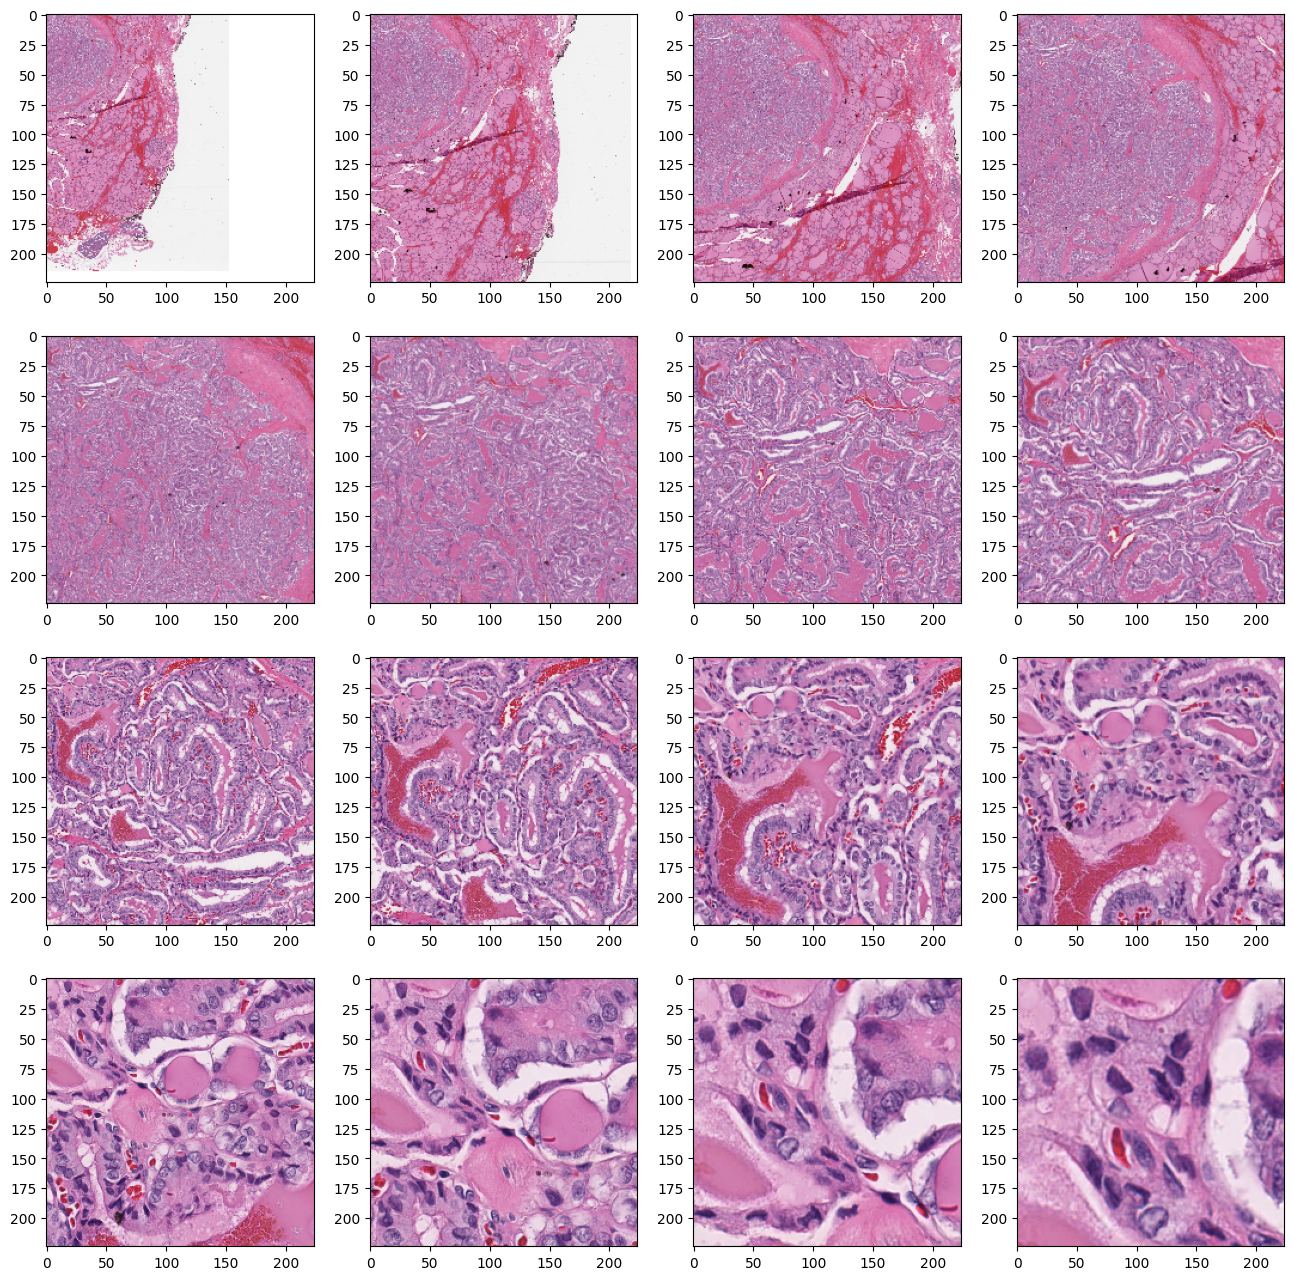

In [18]:
location = (.28, 0.5)
n = 4
scale_factor = 0.7

fig, axes = plt.subplots(n, n, figsize=(16,16))

for i in range(n):
    for j in range(n):
        patch = dataset.get_patch_at_location(wsi, (0.28, 0.5), 15000*(scale_factor**(i*n+j)), 224, location_is_center=False)
        axes[i][j].imshow(patch)

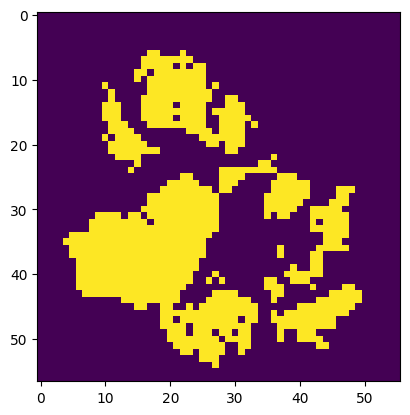

In [12]:
valid_patches = dataset.extract_valid_patches(wsi, 150)
plt.imshow(valid_patches)

3 255


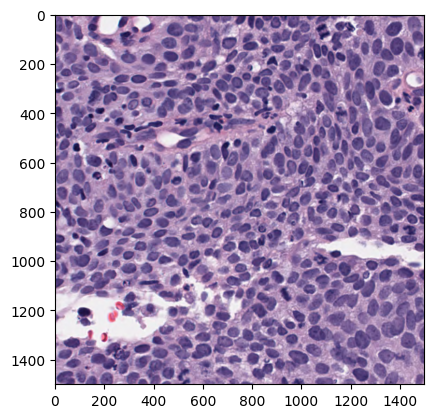

In [45]:
patch = dataset.random_valid_patch(path, 200, 1500)
print(patch.min(), patch.max())
plt.imshow(patch)

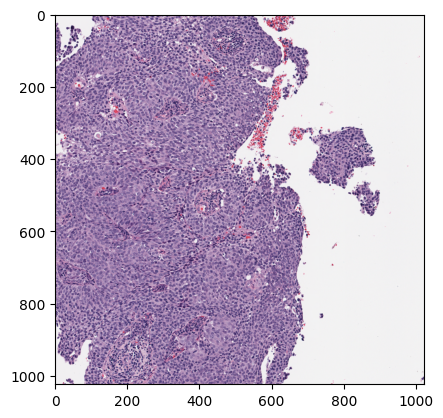

In [46]:
patch = dataset[0]
plt.imshow(patch)

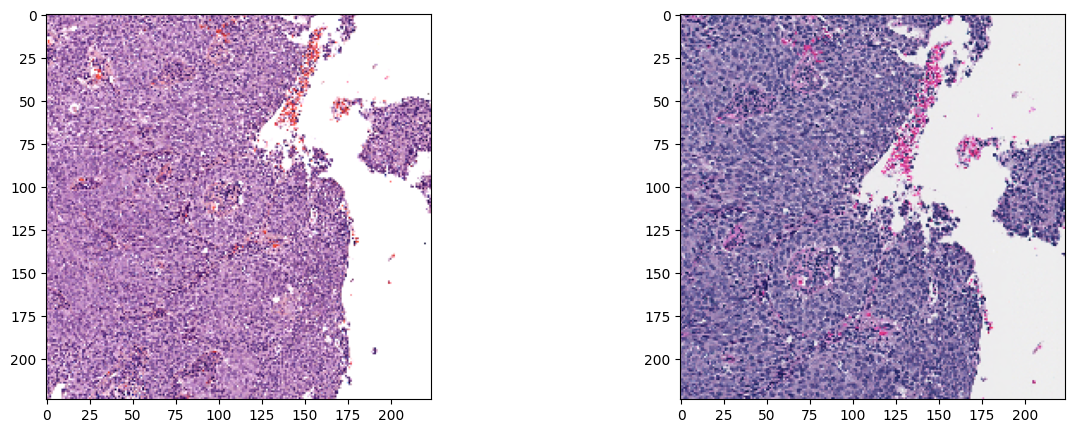

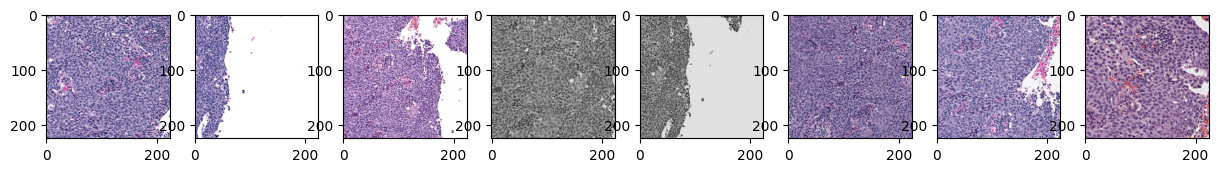

In [47]:
augmentation = Augmentations()
augmented = augmentation(patch)

fig, axes = plt.subplots(1, augmentation.global_crop_number, figsize=(15,5))

for index, global_crop in enumerate(augmented["global_crops"]):
    axes[index].imshow(np.moveaxis(global_crop.numpy(), 0, 2))

fig, axes = plt.subplots(1, augmentation.local_crops_number, figsize=(15,5))
for index, local_crop in enumerate(augmented["local_crops"]):
    axes[index].imshow(np.moveaxis(local_crop.numpy(), 0, 2))

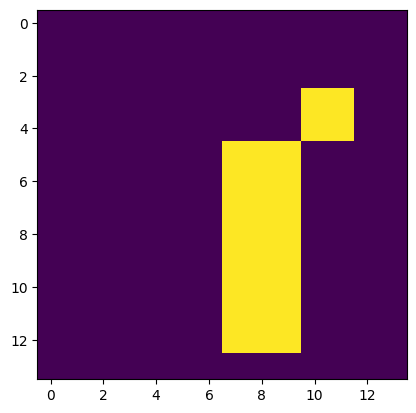

In [124]:
mask_generator = MaskingGenerator((14, 14), 14*14//2)
image = torch.ones((14,14))
mask = mask_generator(14*2)
plt.imshow(mask)